<a href="https://colab.research.google.com/github/syamkrishnanharidas/DATA_ANALYTICS_PYTHON_ASSIGNMENT/blob/main/A07_CAR_AGE_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
data=pd.read_csv('/content/drive/MyDrive/DATASETS/car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [16]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [17]:
data['Price'].nunique()

35

In [18]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


<Axes: >

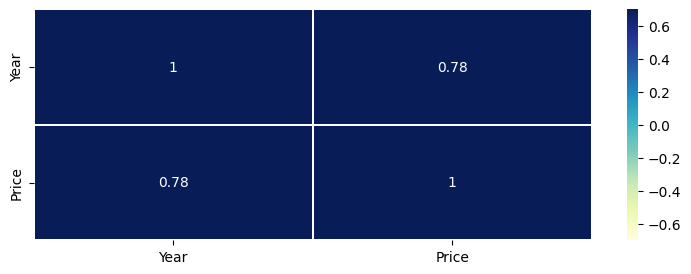

In [22]:
corrmatrix = data.corr()
plt.subplots(figsize=(9,3))
sns.heatmap(corrmatrix, vmin=-0.7, vmax=0.7, annot=True, linewidths=0.2, cmap='YlGnBu')

In [23]:
data1=pd.DataFrame(data)
data1.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [103]:
x=data1.drop('Price',axis=1)
y=data1['Price']

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# LINEAR REGRESSION

In [106]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model =lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [107]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,y_pred))

MSE is 3878767151.073449


In [108]:
from sklearn.metrics import r2_score
print('R2 score is',r2_score(y_test,y_pred))


R2 score is 0.4347961632108023


# SVM MODEL

In [109]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('ACCURACY is:',acc)

ACCURACY is: 0.17857142857142858


# DECISION TREE

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('ACCURACY is:',acc)

ACCURACY is: 0.25


# RANDOM FOREST

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('ACCURACY is:',acc)

ACCURACY is: 0.2857142857142857


# ELBOW METHOD

In [112]:
x=pd.DataFrame(data1)

In [82]:
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',n_init=20)
  kmeans.fit(x)
  WCSS.append(kmeans.inertia_)

WCSS

[923589184565.5529,
 306890974391.27454,
 167146487714.3215,
 95735740288.87257,
 53325959155.63344,
 36469491418.3247,
 23439015222.145657,
 18366831919.20538,
 13891985481.619637,
 10439811570.853552]

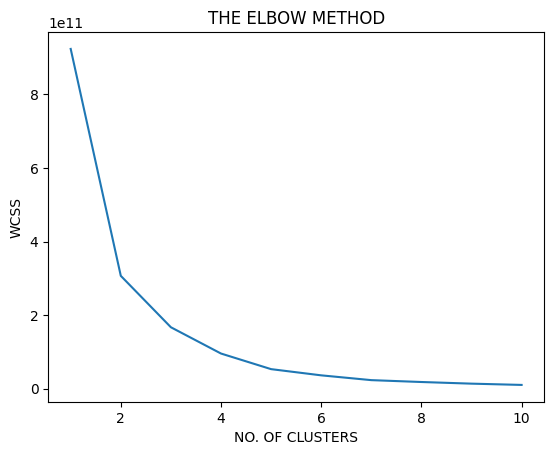

In [83]:
plt.plot(range(1,11),WCSS)
plt.title('THE ELBOW METHOD')
plt.xlabel('NO. OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [113]:
kmeans=KMeans(n_clusters=6,init='k-means++',n_init=10)
kmeans.fit(x)
y_pred=kmeans.predict(x)
y_pred

array([0, 3, 3, 0, 0, 2, 4, 1, 5, 1, 5, 5, 5, 1, 0, 5, 5, 1, 5, 5, 5, 5,
       0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 5, 0, 1, 5, 1, 1, 1,
       1, 0, 5, 0, 4, 1, 2, 1, 2, 2, 5, 1, 2, 1, 0, 1, 5, 1, 1, 1, 5, 5,
       5, 4, 0, 2, 0, 5, 2, 2, 5, 5, 0, 2, 4, 4, 4, 4, 4, 0, 2, 2, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 1, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       4, 4], dtype=int32)

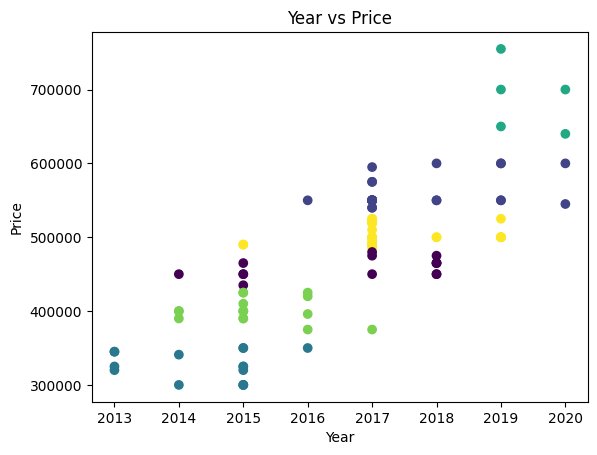

In [114]:
plt.scatter(x['Year'],x['Price'],c=y_pred)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price')
plt.show()